# SnapATAC Analysis

Using data processed by Laksshman.

In [1]:
library(SnapATAC)
library(GenomicRanges)
library(ggplot2) 
library(scales)
# https://github.com/r3fang/SnapATAC/tree/master/examples/10X_snATAC
# https://github.com/r3fang/SnapATAC/tree/master/examples/10X_brain_5k

Loading required package: Matrix

Loading required package: rhdf5

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:SnapATAC’:

    colMeans, colSums, rowMeans, rowSums


The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapp

In [2]:
list.files("/srv/scratch/surag/scATAC-reprog/snap")

[1] "D0.snap"  "D10.snap" "D12.snap" "D14.snap" "D2.snap"  "D4.snap"  "D6.snap" 
[8] "D8.snap"  "H1.snap"

In [3]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14", "H1")
FILE_PREFIX = "/srv/scratch/surag/scATAC-reprog/snap"
BARCODES_PREFIX = "./barcodeLists/20201019_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25/"

file.list = c()
barcode.file.list = c()

for (d in DAYS) {
    file.list = c(file.list, sprintf("%s/%s.snap", FILE_PREFIX, d))
    barcode.file.list = c(barcode.file.list, sprintf("%s/%s.barcodes.txt", BARCODES_PREFIX, d))
}
DAYS
file.list
barcode.file.list

[1] "D0"  "D2"  "D4"  "D6"  "D8"  "D10" "D12" "D14" "H1"

[1] "/srv/scratch/surag/scATAC-reprog/snap/D0.snap" 
[2] "/srv/scratch/surag/scATAC-reprog/snap/D2.snap" 
[3] "/srv/scratch/surag/scATAC-reprog/snap/D4.snap" 
[4] "/srv/scratch/surag/scATAC-reprog/snap/D6.snap" 
[5] "/srv/scratch/surag/scATAC-reprog/snap/D8.snap" 
[6] "/srv/scratch/surag/scATAC-reprog/snap/D10.snap"
[7] "/srv/scratch/surag/scATAC-reprog/snap/D12.snap"
[8] "/srv/scratch/surag/scATAC-reprog/snap/D14.snap"
[9] "/srv/scratch/surag/scATAC-reprog/snap/H1.snap"

[1] "./barcodeLists/20201019_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D0.barcodes.txt" 
[2] "./barcodeLists/20201019_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D2.barcodes.txt" 
[3] "./barcodeLists/20201019_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D4.barcodes.txt" 
[4] "./barcodeLists/20201019_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D6.barcodes.txt" 
[5] "./barcodeLists/20201019_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D8.barcodes.txt" 
[6] "./barcodeLists/20201019_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D10.barcodes.txt"
[7] "./barcodeLists/20201019_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D12.barcodes.txt"
[8] "./barcodeLists/20201019_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D14.barcodes.txt"
[9] "./barcodeLists/20201019_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//H1.barcodes.txt"

In [4]:
x.sp.ls = lapply(seq(file.list), function(i) {
    x.sp = createSnap(file = file.list[i],                      
                     sample = DAYS[i])
    x.sp
})

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...



In [5]:
# Filter cells using previously selected barcodes (see 20200424_ArchR/DoubletAnalysis.ipynb)

barcode.list = lapply(barcode.file.list, function(file){
  read.table(file)[,1];
})

x.sp.list = lapply(seq(x.sp.ls), function(i){
  x.sp = x.sp.ls[[i]];
  x.sp  = x.sp[x.sp@barcode %in% barcode.list[[i]],];
})
names(x.sp.list) = DAYS;

In [6]:
x.sp.list

$D0
number of barcodes: 10824
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0

$D2
number of barcodes: 6265
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0

$D4
number of barcodes: 5509
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0

$D6
number of barcodes: 7448
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0

$D8
number of barcodes: 7202
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0

$D10
number of barcodes: 1425
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0

$D12
number of barcodes: 3039
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0

$D14
number of barcodes: 13608
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0

$H1
number of barcodes: 7082
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0


In [7]:
x.sp.list = lapply(seq(x.sp.list), function(i) {
    x.sp = addBmatToSnap(x.sp.list[[i]], bin.size=5000, num.cores=5)
    x.sp
})

Epoch: reading cell-bin count matrix session ...

Epoch: reading cell-bin count matrix session ...

Epoch: reading cell-bin count matrix session ...

Epoch: reading cell-bin count matrix session ...

Epoch: reading cell-bin count matrix session ...

Epoch: reading cell-bin count matrix session ...

Epoch: reading cell-bin count matrix session ...

Epoch: reading cell-bin count matrix session ...

Epoch: reading cell-bin count matrix session ...



In [8]:
bin.shared = Reduce(intersect, lapply(x.sp.list, function(x.sp) x.sp@feature$name));

In [9]:
# merge timepoints

x.sp.list <- lapply(x.sp.list, function(x.sp){
    idy = match(bin.shared, x.sp@feature$name);
    x.sp[,idy, mat="bmat"];
  })
x.sp = Reduce(snapRbind, x.sp.list);

Warning message:
“'rBind' is deprecated.
 Since R version 3.2.0, base's rbind() should work fine with S4 objects”


In [10]:
x.sp

number of barcodes: 62402
number of bins: 620094
number of genes: 0
number of peaks: 0
number of motifs: 0

In [11]:
rm(x.sp.list); # free memory
gc()

used       (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells    4561481  243.7    7491581   400.1    5692858   304.1
Vcells 1062664296 8107.5 3868392136 29513.5 2961201226 22592.2

In [12]:
# check if reads at OCT promoter (very few or none in initial version)
sum(x.sp@bmat[,subjectHits(findOverlaps(GRanges(c("chr6:31170549-31170836")), x.sp@feature))])

[1] 21275

In [13]:
x.sp = makeBinary(x.sp, mat="bmat");

In [14]:
tempCov = Matrix::rowSums(x.sp@bmat)

In [15]:
# these are insertions!
min(tempCov)

[1] 847

In [16]:
# remove UMIs with few bins
# x.sp = x.sp[tempCov>1000, , mat="bmat"]
# x.sp

In [17]:
# sampling few cells for speed (simplified analysis)
# sample_idx = sort(sample(seq(1,dim(x.sp@bmat)[1]), 10000))
# x.sp = x.sp[sample_idx,]
# x.sp

In [18]:
# OR keeping the same number of cells from each day
# fewest_per_day = min(table(x.sp@sample))
# print(fewest_per_day)

# idxs = c()
# for (d in DAYS) {
#     idxs = c(idxs, sample(which(x.sp@sample==d), fewest_per_day))
# }
# idxs = sort(idxs)

# table(x.sp@sample[idxs])

# x.sp = x.sp[idxs, ]

## Filtering bins

In [19]:
black_list = read.table("../../../resources/blacklist/GRch38_unified_blacklist.bed");
black_list.gr = GRanges(
    black_list[,1], 
    IRanges(black_list[,2], black_list[,3])
  );

In [20]:
idy = queryHits(findOverlaps(x.sp@feature, black_list.gr));

In [21]:
if(length(idy) > 0){x.sp = x.sp[,-idy, mat="bmat"]};

In [22]:
chr.exclude = seqlevels(x.sp@feature)[grep("random|chrM|chrUn", seqlevels(x.sp@feature))];
idy = grep(paste(chr.exclude, collapse="|"), x.sp@feature);
if(length(idy) > 0){x.sp = x.sp[,-idy, mat="bmat"]};

In [23]:
x.sp

number of barcodes: 62402
number of bins: 602724
number of genes: 0
number of peaks: 0
number of motifs: 0

number of barcodes: 62402
number of bins: 542721
number of genes: 0
number of peaks: 0
number of motifs: 0

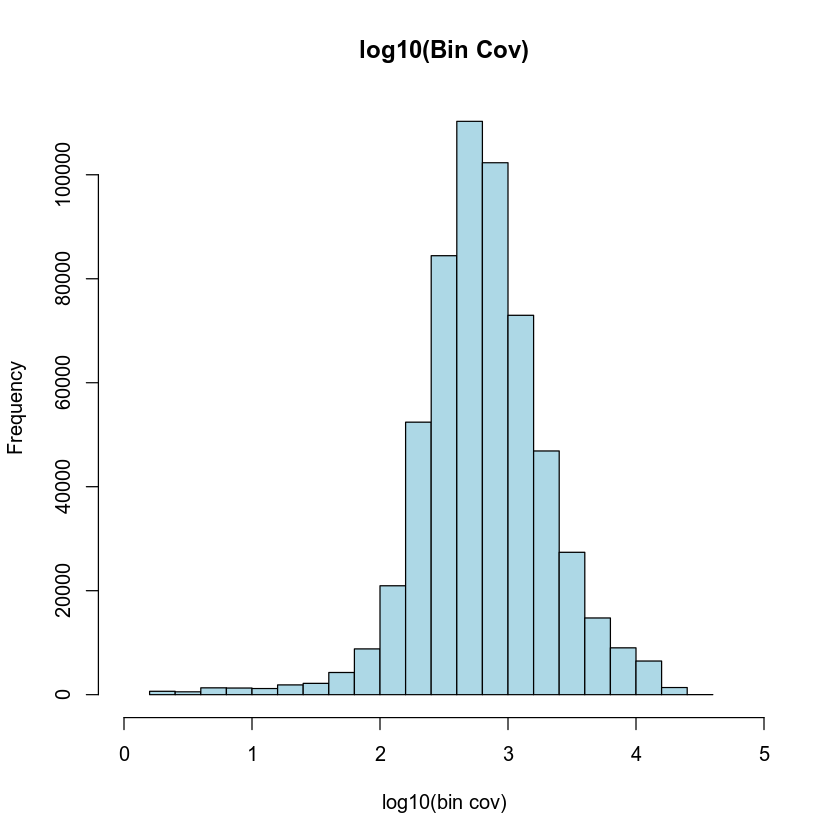

In [24]:
bin.cov = log10(Matrix::colSums(x.sp@bmat)+1);
hist(
  bin.cov[bin.cov > 0], 
  xlab="log10(bin cov)", 
  main="log10(Bin Cov)", 
  col="lightblue", 
  xlim=c(0, 5)
);
bin.cutoff = quantile(bin.cov[bin.cov > 0], 0.95);
idy = which(bin.cov <= bin.cutoff & bin.cov > 0);
x.sp = x.sp[, idy, mat="bmat"];
x.sp

## Dim Reduction

In [25]:
rowCovs = Matrix::rowSums(x.sp@bmat)

In [26]:
row.covs = log10(rowCovs+1);
row.covs.dens = density(
    x = row.covs, 
    bw = 'nrd', adjust = 1
  );
sampling_prob = 1 / (approx(x = row.covs.dens$x, y = row.covs.dens$y, xout = row.covs)$y + .Machine$double.eps); 

In [27]:
# set.seed(1);
# idx.landmark.ds = sort(sample(x = seq(nrow(x.sp)), size = 10000, prob = sampling_prob));
# x.landmark.sp = x.sp[idx.landmark.ds,];
# x.query.sp = x.sp[-idx.landmark.ds,];

In [28]:
table(x.sp@sample)


   D0   D10   D12   D14    D2    D4    D6    D8    H1 
10824  1425  3039 13608  6265  5509  7448  7202  7082 

In [29]:
min(table(x.sp@sample))

[1] 1425

In [30]:
set.seed(1);
idx.landmark.ds = c()

# This method samples equal landmarks per day
LANDMARKS_PER_DAY = ceiling((9*1400)/length(DAYS))

for (d in DAYS) {
    idx.landmark.ds = c(idx.landmark.ds, 
                        sample(x = which(x.sp@sample==d), size = LANDMARKS_PER_DAY, prob = sampling_prob[which(x.sp@sample==d)])
                       )
}
idx.landmark.ds = sort(idx.landmark.ds);
x.landmark.sp = x.sp[idx.landmark.ds,];
x.query.sp = x.sp[-idx.landmark.ds,];

In [31]:
table(x.landmark.sp@sample)


  D0  D10  D12  D14   D2   D4   D6   D8   H1 
1400 1400 1400 1400 1400 1400 1400 1400 1400 

In [32]:
x.landmark.sp = runDiffusionMaps(
    obj= x.landmark.sp,
    input.mat="bmat", 
    num.eigs=50
);

Epoch: checking the inputs ...

Epoch: computing jaccard similarity matrix ...

Epoch: fitting regression model ...

Epoch: performing normalization ...

Epoch: computing eigen decomposition ...

Epoch: Done



In [33]:
x.query.sp = runDiffusionMapsExtension(
    obj1=x.landmark.sp, 
    obj2=x.query.sp,
    input.mat="bmat"
  );

Epoch: checking the inputs ...

Epoch: computing jaccard similarity matrix ...

Epoch: performing normalization ...

Epoch: projecting query cells to the reference ...

Epoch: Done



In [34]:
x.landmark.sp@metaData$landmark = 1;
x.query.sp@metaData$landmark = 0;
x.sp = snapRbind(x.landmark.sp, x.query.sp);
## combine landmarks and query cells;
x.sp = x.sp[order(x.sp@sample),]; # IMPORTANT
rm(x.landmark.sp, x.query.sp); # free memory

# IMP: recompute since order has changed
rowCovs = Matrix::rowSums(x.sp@bmat)

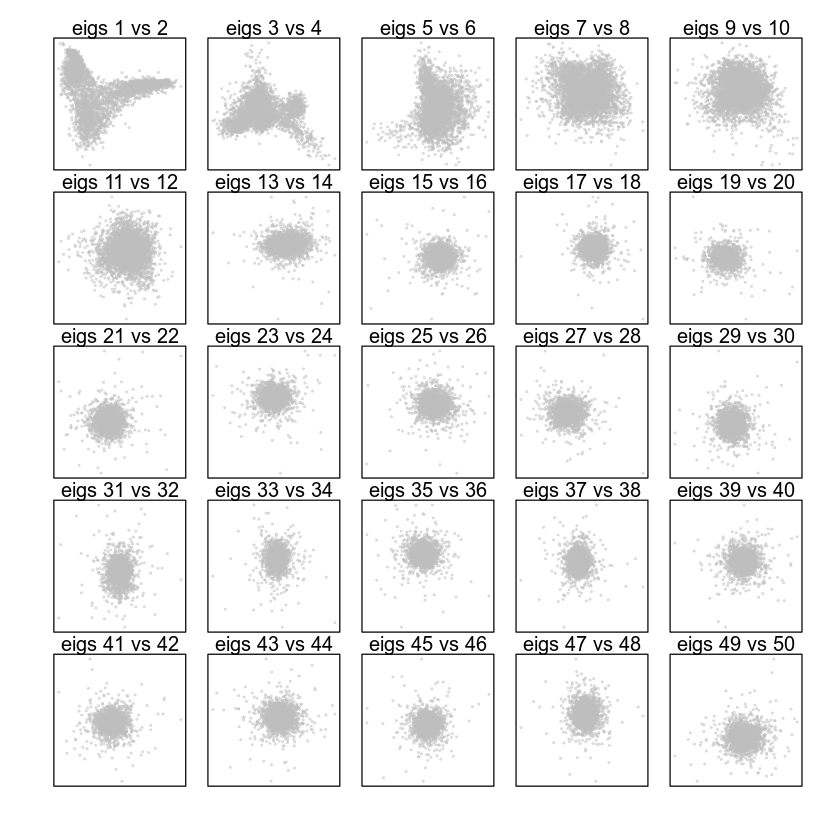

In [35]:
plotDimReductPW(
    obj=x.sp, 
    eigs.dims=1:50,
    point.size=0.3,
    point.color="grey",
    point.shape=19,
    point.alpha=0.6,
    down.sample=5000,
    pdf.file.name=NULL, 
    pdf.height=7, 
    pdf.width=7
  );

In [36]:
x.sp = runKNN(
    obj= x.sp,
    eigs.dim=1:10,
    k=15
  );

In [42]:
library(leiden)

In [70]:
x.sp = runCluster(
   obj=x.sp,
   tmp.folder=tempdir(),
   louvain.lib="leiden",
#    path.to.snaptools=NULL,
   resolution = 1.35,
   seed.use=1
);
x.sp@metaData$cluster = x.sp@cluster;

In [71]:
table(x.sp@cluster)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
7639 5660 5203 4850 4260 4038 3575 3554 3447 2878 2625 2220 2173 2167 2105 2103 
  17   18   19 
1470 1233 1202 

In [37]:
x.sp = runViz(
    obj=x.sp, 
    tmp.folder=tempdir(),
    dims=2,
    eigs.dims=1:10, 
    method="umap",
    seed.use=2,
    num.cores=10,
  );

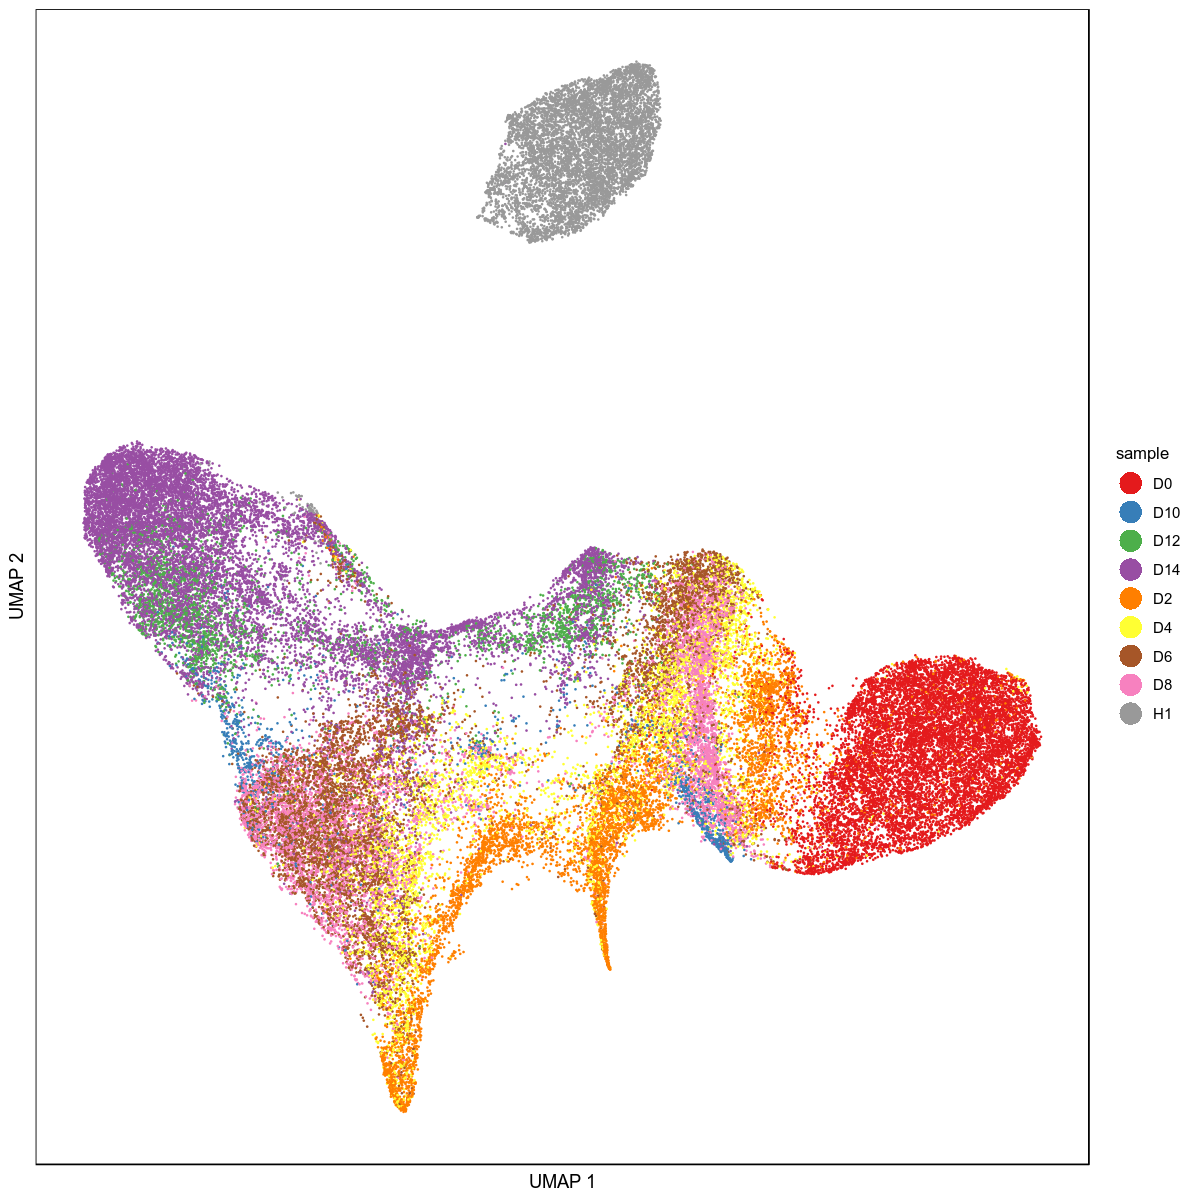

In [39]:
options(repr.plot.width = 10, repr.plot.height = 10)

df = data.frame(x.sp@umap, sample=x.sp@sample)
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df) +
geom_point(size=0.1, alpha=1, aes(x=umap.1 , y=umap.2, col=sample)) +
scale_color_brewer( palette = "Set1") +
# ggtitle("All Cells (Day)") + 
theme_classic() +
xlab("UMAP 1") + ylab("UMAP 2") +
theme(plot.title = element_text(hjust = 0.5),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      legend.title=element_text(size=10), 
      legend.text=element_text(size=9),
      panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
guides(colour = guide_legend(override.aes = list(shape=16, alpha=1, size=6)))

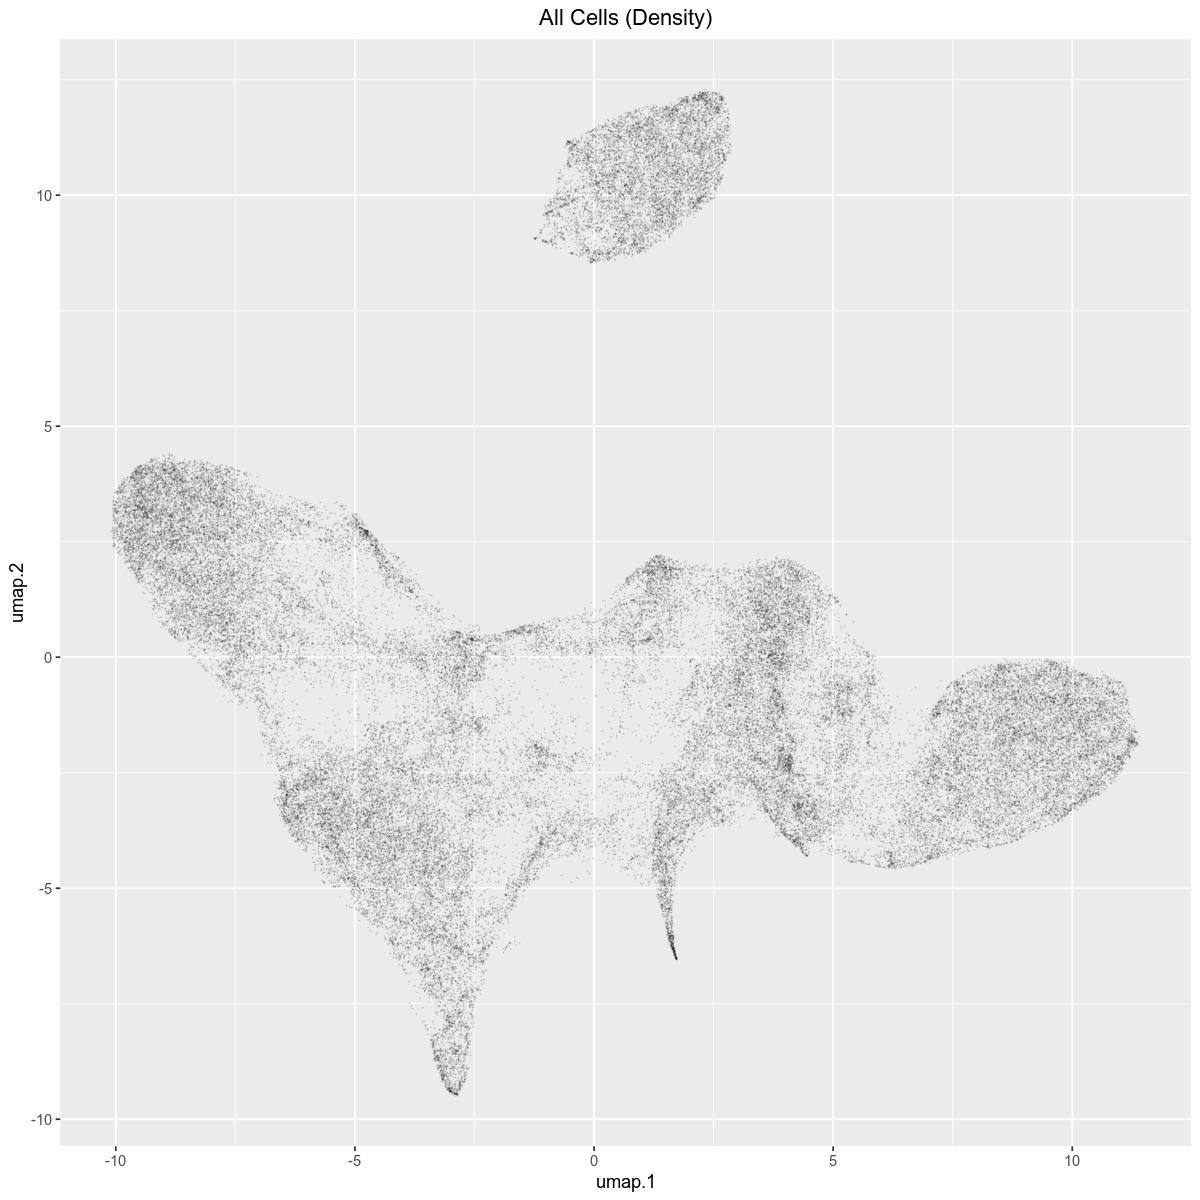

In [40]:
df = data.frame(x.sp@umap, x.sp@sample)

ggplot(df) +
geom_point(shape=20, size=0.05, alpha=0.1, aes(x=umap.1 , y=umap.2)) +
ggtitle("All Cells (Density)") + 
theme(plot.title = element_text(hjust = 0.5)) 

In [46]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

In [98]:
# manually modified a cluster, renumbered
# new_clust = as.integer(x.sp@cluster)
# new_clust[(new_clust==8)&(x.sp@umap[,"umap-1"] < 2.5)] = 18
# new_clust = factor(new_clust)

# x.sp@cluster = new_clust
# x.sp@metaData$cluster = x.sp@cluster

In [74]:
# combine fibroblast clusters
new_clust = as.integer(x.sp@cluster)
new_clust[new_clust==6] = 5
new_clust[new_clust==11] = 5

# combine iPSC clusters
new_clust[new_clust==14] = 4

In [88]:
# factor and renumber
new_clust = factor(new_clust)
levels(new_clust) = as.character(seq(length(levels(new_clust))))

In [89]:
x.sp@cluster = new_clust
x.sp@metaData$cluster = x.sp@cluster

In [94]:
# exchanged iPSC cluster to be the last (16th)
new_clust = as.integer(x.sp@cluster)
new_clust[(new_clust==16)] = 99
new_clust[(new_clust==4)] = 16
new_clust[(new_clust==99)] = 4
new_clust = factor(new_clust)

x.sp@cluster = new_clust
x.sp@metaData$cluster = x.sp@cluster

In [97]:
# exchanged clump cluster to be second last (15th)
new_clust = as.integer(x.sp@cluster)
new_clust[(new_clust==14)] = 99
new_clust[(new_clust==15)] = 14
new_clust[(new_clust==99)] = 15
new_clust = factor(new_clust)

x.sp@cluster = new_clust
x.sp@metaData$cluster = x.sp@cluster

In [107]:
table(x.sp@cluster)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
 7639  5660  5203  1202 10923  3575  3554  3447  2878  2220  2173  2105  2103 
   14    15    16 
 1233  1470  7017 

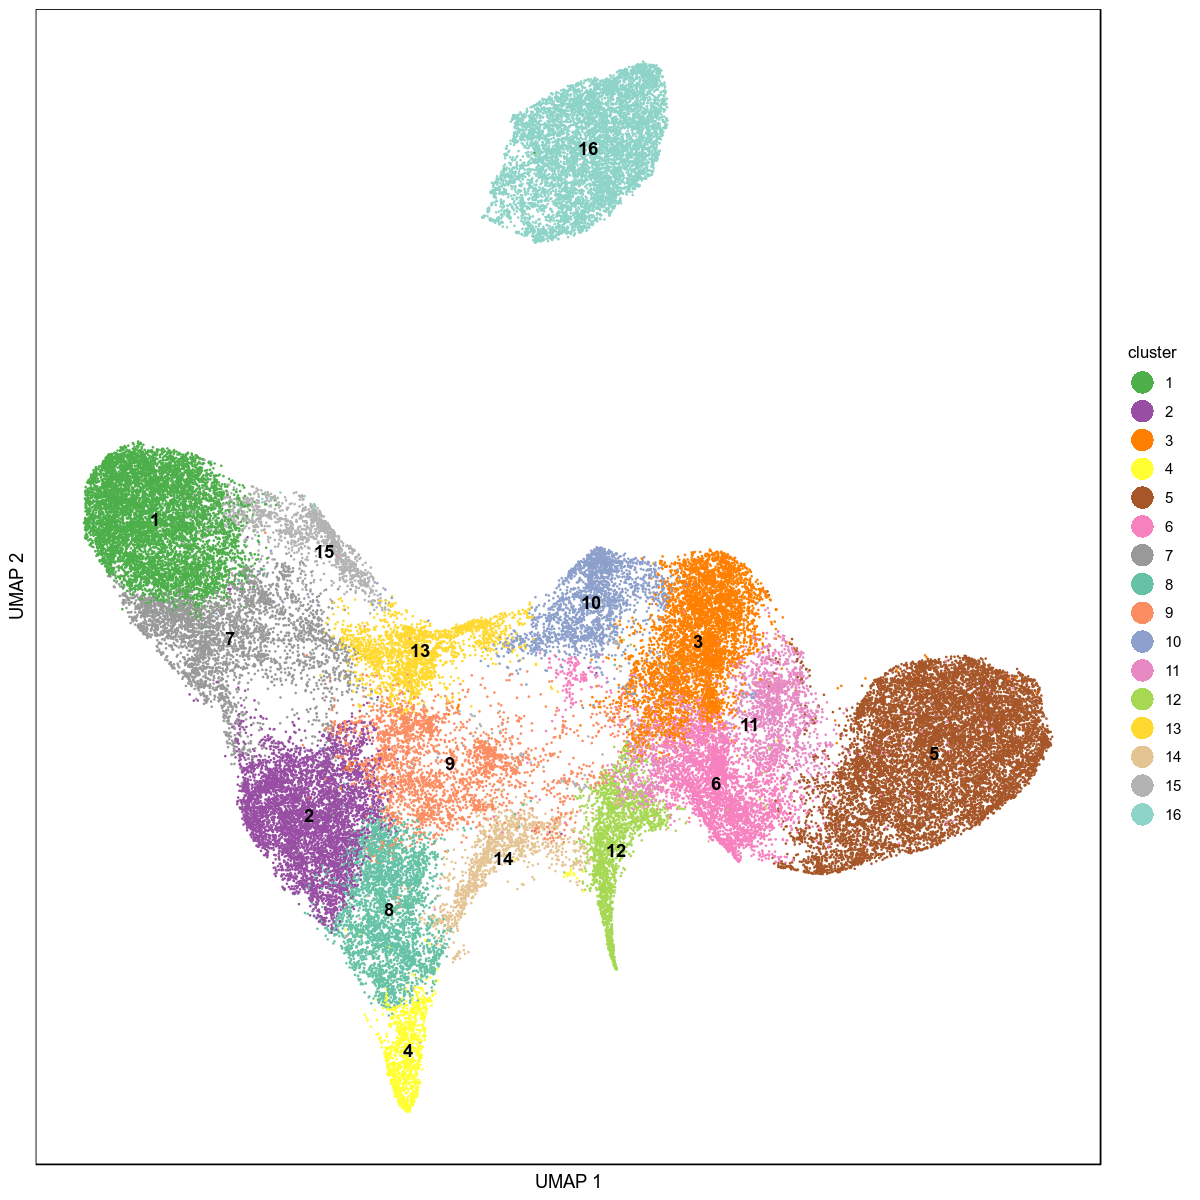

In [99]:
options(repr.plot.width = 10, repr.plot.height = 10)

df = data.frame(x.sp@umap, 
                cluster=x.sp@cluster)
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df) +
geom_point(size=0.1, alpha=1, aes(x=umap.1 , y=umap.2, col=cluster)) +
scale_colour_manual(values = col_vector[seq(48,length(col_vector))]) +
# ggtitle("All Cells (Day)") + 
theme_classic() +
xlab("UMAP 1") + ylab("UMAP 2") +
theme(plot.title = element_text(hjust = 0.5),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      legend.title=element_text(size=10), 
      legend.text=element_text(size=9),
      panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
geom_text(data=data.frame(aggregate(x.sp@umap, 
                                    list(x.sp@cluster), mean)),
         aes(x=umap.1, y=umap.2, label=Group.1), fontface = "bold")  +
guides(colour = guide_legend(override.aes = list(shape=16, alpha=1, size=6)))


In [101]:
table(x.sp@sample)


   D0   D10   D12   D14    D2    D4    D6    D8    H1 
10824  1425  3039 13608  6265  5509  7448  7202  7082 

In [100]:
table(x.sp@sample[x.sp@cluster=="15"])


 D0 D10 D12 D14  D2  D4  D6  D8  H1 
  5  20 167 947  39  46 120  63  63 

In [102]:
# how many cluster-sample connections are there?
c=0
for (i in unique(x.sp@cluster)) {
    c = c + length(table(x.sp@sample[x.sp@cluster==i]))
}
c

[1] 102

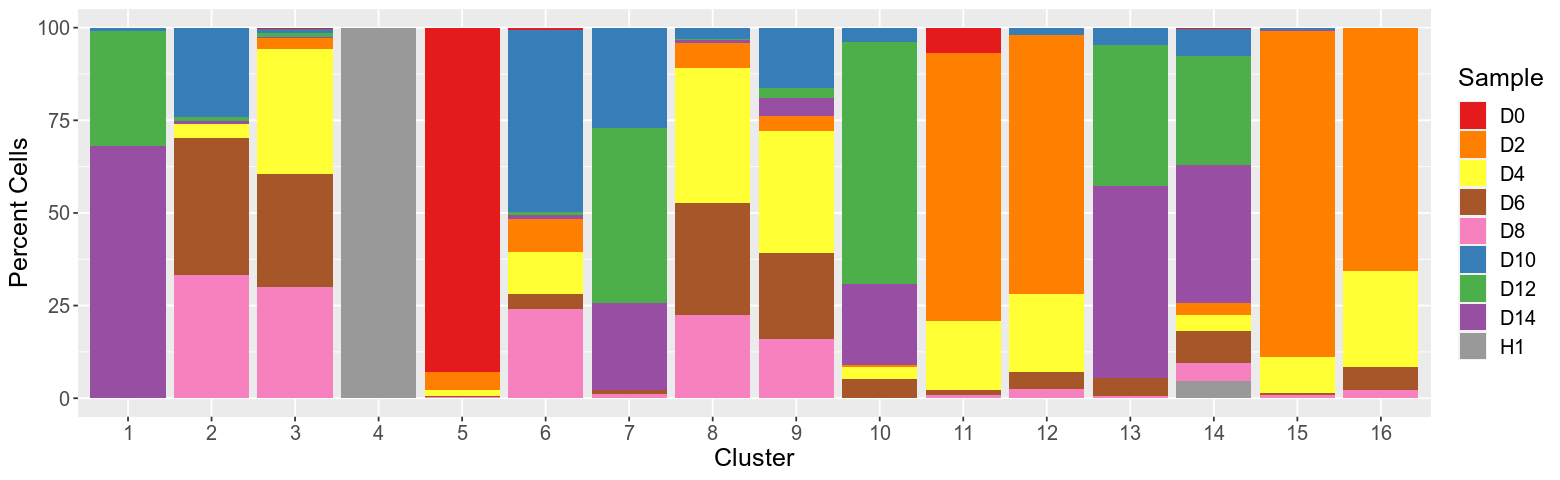

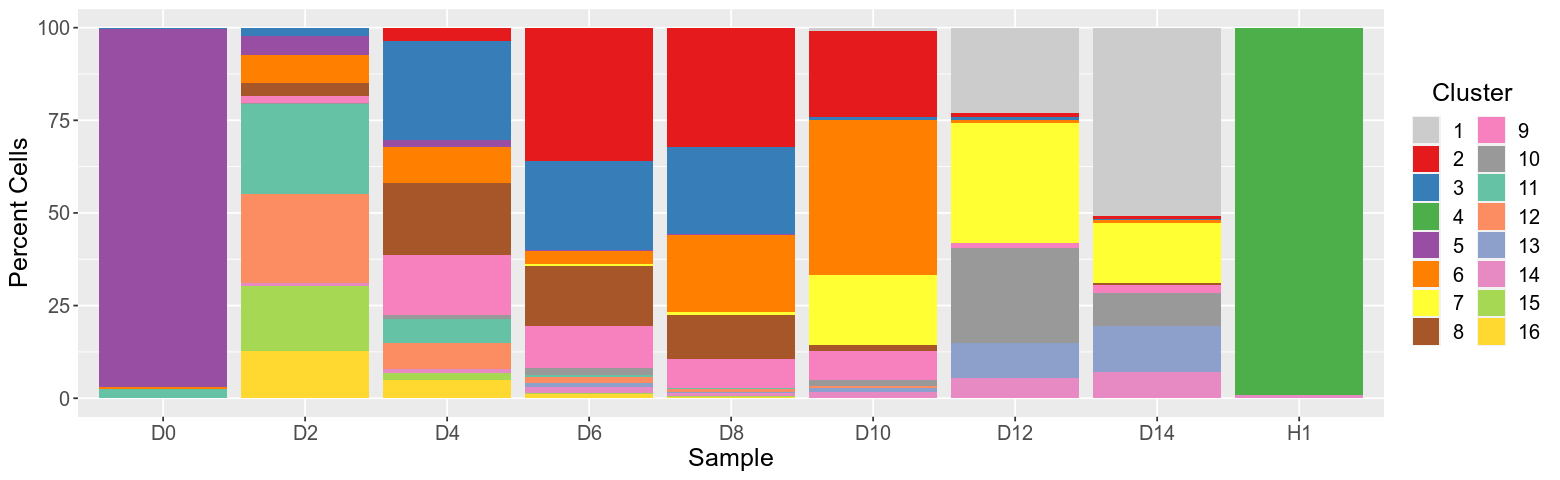

In [93]:
# TODO: clusters should be ordered such that similar ones are close in number and colour

# day-wise cluster membership + cluster-wise day membership
options(repr.plot.width = 13, repr.plot.height = 4)

sample_cluster_df = data.frame(sample=x.sp@sample, cluster=x.sp@cluster, count=1)

# count cells per sample x cluster
sample_cluster_cts = aggregate(.~sample+cluster, 
                               sample_cluster_df, 
                               sum)
# normalise per sample
sample_cts = aggregate(sample_cluster_df[,"count"], list(sample_cluster_df[,"sample"]), sum)
rownames(sample_cts) = sample_cts$Group.1
sample_cts$Group.1 = NULL

# frac of cluster per sample
sample_cluster_cts$frac_cluster = 100*sample_cluster_cts$count/sample_cts[sample_cluster_cts$sample, "x"]

# normalise per cluster
cluster_norm_cts = aggregate(sample_cluster_cts[,"frac_cluster"], list(sample_cluster_cts[,"cluster"]), sum)
rownames(cluster_norm_cts) = cluster_norm_cts$Group.1
cluster_norm_cts$Group.1 = NULL

# frac of day (after normalizing for number of cells per day) per sample
sample_cluster_cts$frac_day = 100*sample_cluster_cts$frac_cluster/cluster_norm_cts[sample_cluster_cts$cluster, "x"]

ggplot(data=sample_cluster_cts, aes(x=cluster, y=frac_day, fill=sample)) +
scale_fill_brewer(breaks=DAYS, palette = "Set1") +
geom_bar(stat="identity") +
ylab("Percent Cells") +
xlab("Cluster") +
guides(fill = guide_legend(ncol=1, title="Sample", pos="center")) +
theme(text = element_text(size=15))

# Stacked barplot with multiple groups
ggplot(data=sample_cluster_cts, aes(x=factor(sample, levels=DAYS), y=frac_cluster, fill=cluster)) +
scale_fill_manual(values = col_vector[seq(45,74,1)]) +
geom_bar(stat="identity") +
ylab("Percent Cells") +
xlab("Sample") +
guides(fill = guide_legend(ncol=2, title="Cluster", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

In [49]:
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
txdb = TxDb.Hsapiens.UCSC.hg38.knownGene
prom.hg38 = promoters(genes(txdb), upstream = 2000, downstream = 0)
overlaps = findOverlaps(x.sp@feature, prom.hg38);
idy = queryHits(overlaps)
promoter_ratio = Matrix::rowSums(x.sp@bmat[,idy]) / Matrix::rowSums(x.sp@bmat);

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chrEBV
  - in 'y': chr1_GL383518v1_alt, chr1_GL383519v1_alt, chr1_GL383520v2_alt, chr1_KI270759v1_alt, chr1_KI270760v1_alt, chr1_KI270761v1_alt, chr1_KI270762v1_alt, chr1_KI270763v1_alt, chr1_KI270764v1_alt, chr1_KI270765v1_alt, chr1_KI270766v1_alt, chr1_KI270892v1_alt, chr2_GL383521v1_alt, chr2_GL383522v1_alt, chr2_GL582966v2_alt, chr2_KI270767v1_alt, chr2_KI270768v1_alt, chr2_KI270769v1_alt, chr2_KI270770v1_alt, chr2_KI270771v1_alt, chr2_KI270772v1_alt, chr2_KI270773v1_alt, chr2_KI270774v1_alt, chr2_KI270775v1_alt, chr2_KI270776v1_alt, chr2_KI27089

In [50]:
quantile(promoter_ratio, c(0, 0.1, 0.5, 0.9, 0.99, 1))

0%        10%        50%        90%        99%       100% 
0.02116402 0.04816099 0.05714286 0.06749398 0.07981886 0.12224449

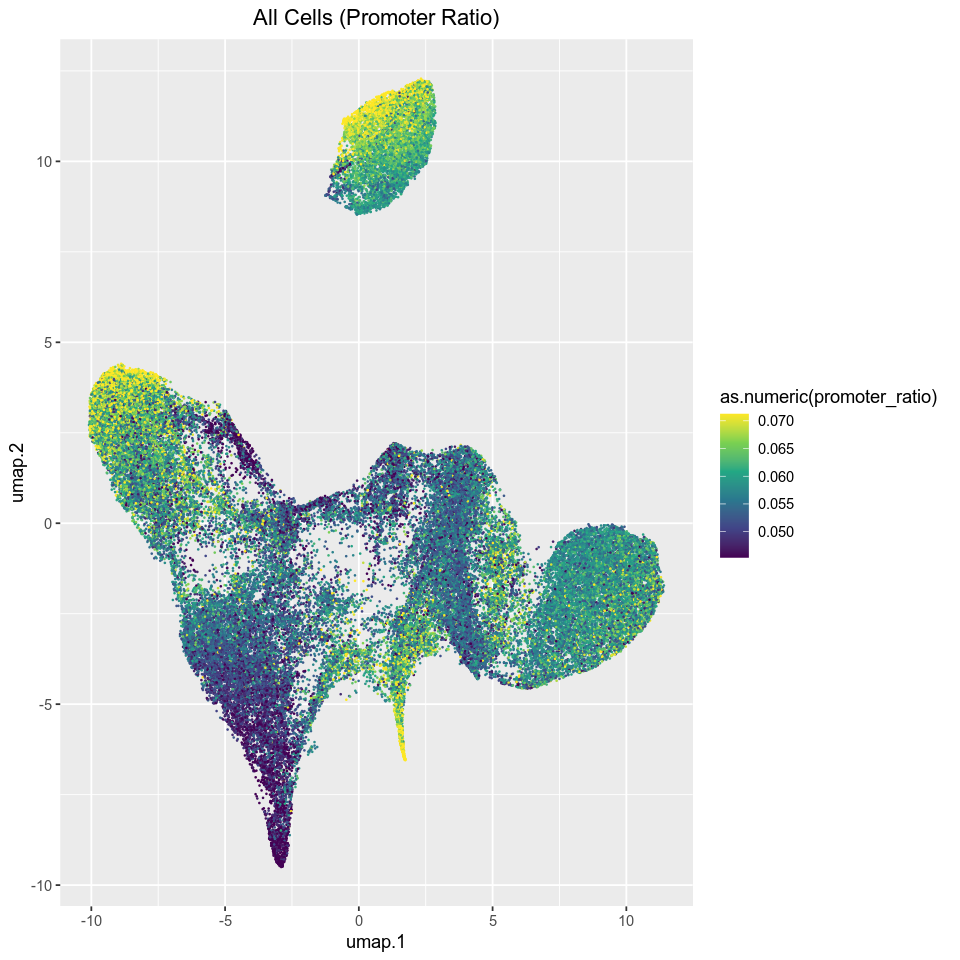

In [51]:
options(repr.plot.width = 8, repr.plot.height = 8)


df = data.frame(x.sp@umap, promoter_ratio)
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df, aes(x=umap.1, y=umap.2, col=as.numeric(promoter_ratio))) +
geom_point(size=0.1, alpha=1) +
scale_color_viridis_c(lim=c(quantile(promoter_ratio,0.05), 
                          quantile(promoter_ratio,0.95)), 
                          oob=squish) +
ggtitle("All Cells (Promoter Ratio)") + 
theme(plot.title = element_text(hjust = 0.5)) 

#     pdf.file.name = sprintf("./figs/%s_5kb_selectedBarcodes_gt1000_n%d_UMAP_day", format(Sys.Date(), "%Y%m%d"), dim(x.sp@bmat)[1])

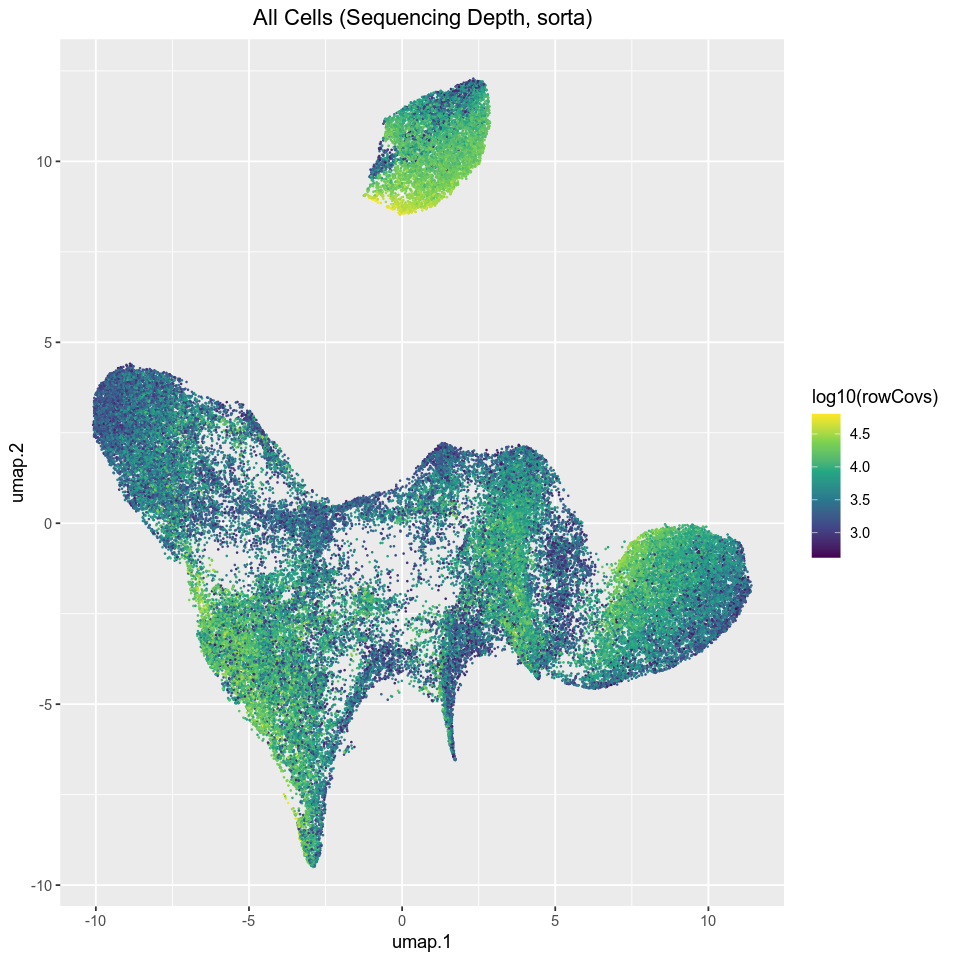

In [41]:
options(repr.plot.width = 8, repr.plot.height = 8)

df = data.frame(x.sp@umap, rowCovs)
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df, aes(x=umap.1, y=umap.2, col=log10(rowCovs))) +
geom_point(size=0.1, alpha=1) +
scale_color_viridis_c() +
ggtitle("All Cells (Sequencing Depth, sorta)") + 
theme(plot.title = element_text(hjust = 0.5)) 

In [116]:
# alternatively from saved QC metrics
qc_scores = read.table(sprintf("%s/scores.tsv", BARCODES_PREFIX))
head(qc_scores)

nFrags tss    sample doublet_enrich
D0_CCCATGTACAGCTTTG 70088   9.713 D0     0             
D0_AAGGTAATGACGCGAA 68843  10.239 D0     0             
D0_CTAGCTCACCCGTTAA 68035  10.787 D0     0             
D0_GGTTCCTTGCGAGTTT 66577   9.515 D0     0             
D0_CAGTGGAGAGCTCTTC 66485   9.687 D0     0             
D0_CAACAACACCCTATCC 66356  10.568 D0     0

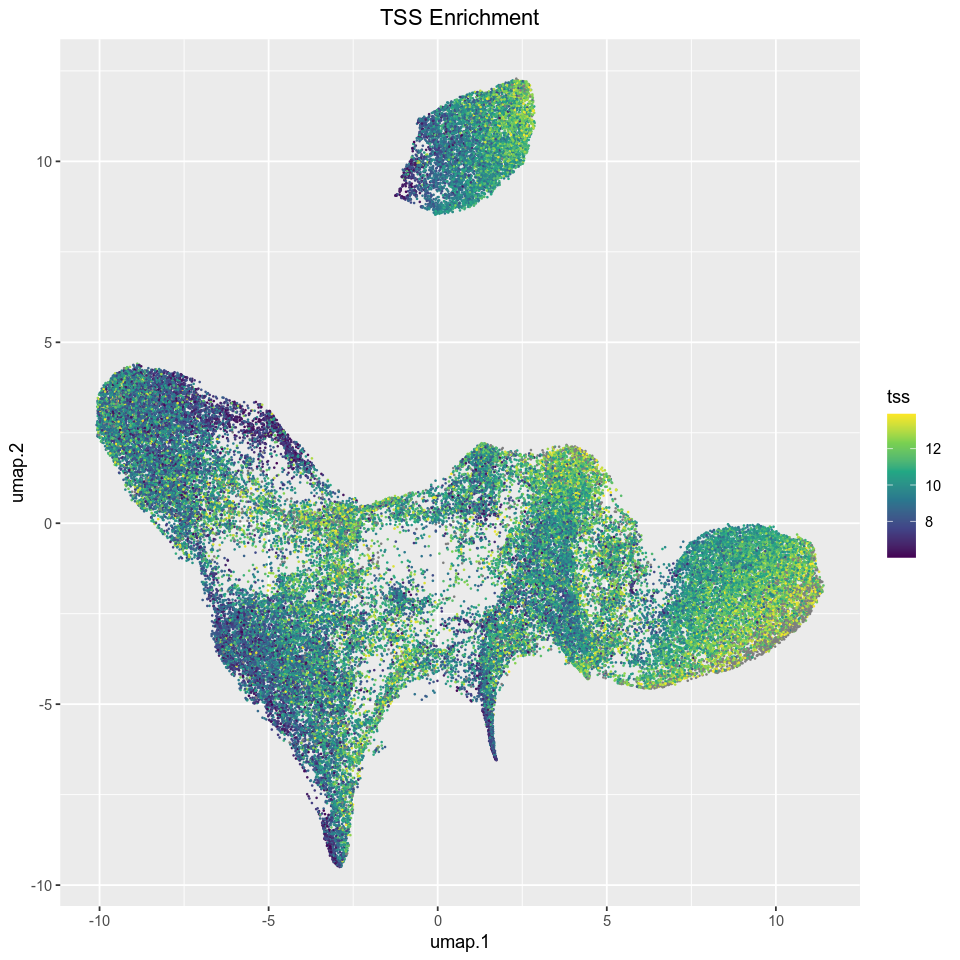

In [123]:
options(repr.plot.width = 8, repr.plot.height = 8)
s = qc_scores[paste(x.sp@sample, x.sp@barcode, sep='_'), "tss"]
df = data.frame(x.sp@umap, 
                tss=s)
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df, aes(x=umap.1, y=umap.2, col=tss)) +
geom_point(size=0.1, alpha=1) +
scale_color_viridis_c(limits=c(quantile(s, 0.0),
                              quantile(s, 0.95))) +
ggtitle("TSS Enrichment") + 
theme(plot.title = element_text(hjust = 0.5)) 

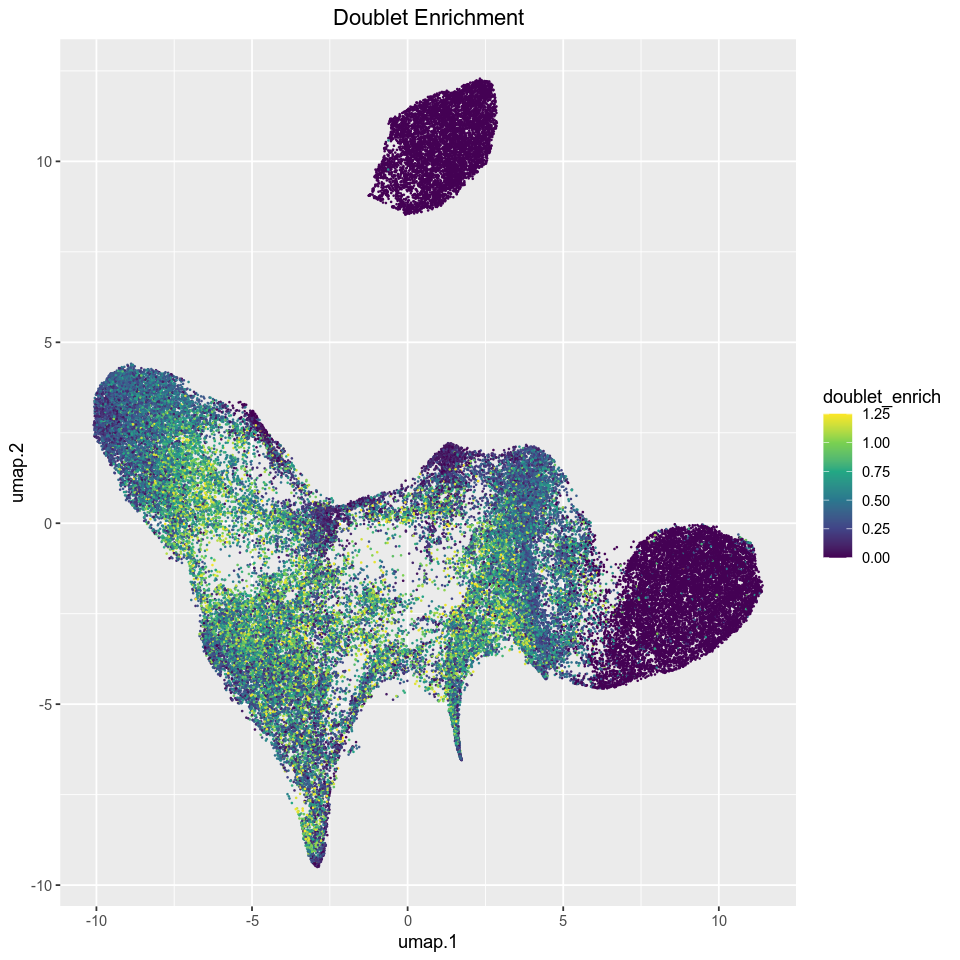

In [126]:
options(repr.plot.width = 8, repr.plot.height = 8)

df = data.frame(x.sp@umap, 
                doublet_enrich=qc_scores[paste(x.sp@sample, x.sp@barcode, sep='_'), "doublet_enrich"])
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df, aes(x=umap.1, y=umap.2, col=doublet_enrich)) +
geom_point(size=0.1, alpha=1) +
scale_color_viridis_c() +
ggtitle("Doublet Enrichment") + 
theme(plot.title = element_text(hjust = 0.5)) 

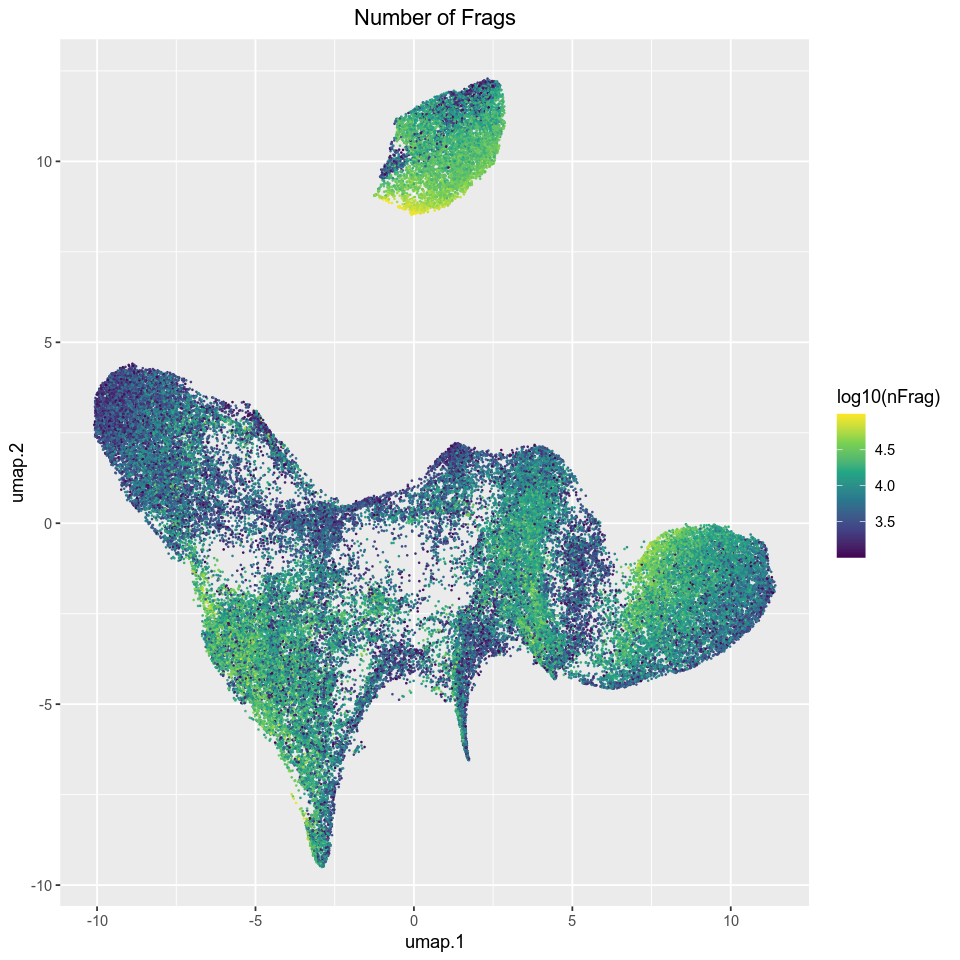

In [121]:
options(repr.plot.width = 8, repr.plot.height = 8)

df = data.frame(x.sp@umap, 
                nFrag=qc_scores[paste(x.sp@sample, x.sp@barcode, sep='_'), "nFrags"])
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df, aes(x=umap.1, y=umap.2, col=log10(nFrag))) +
geom_point(size=0.1, alpha=1) +
scale_color_viridis_c() +
ggtitle("Number of Frags") + 
theme(plot.title = element_text(hjust = 0.5)) 

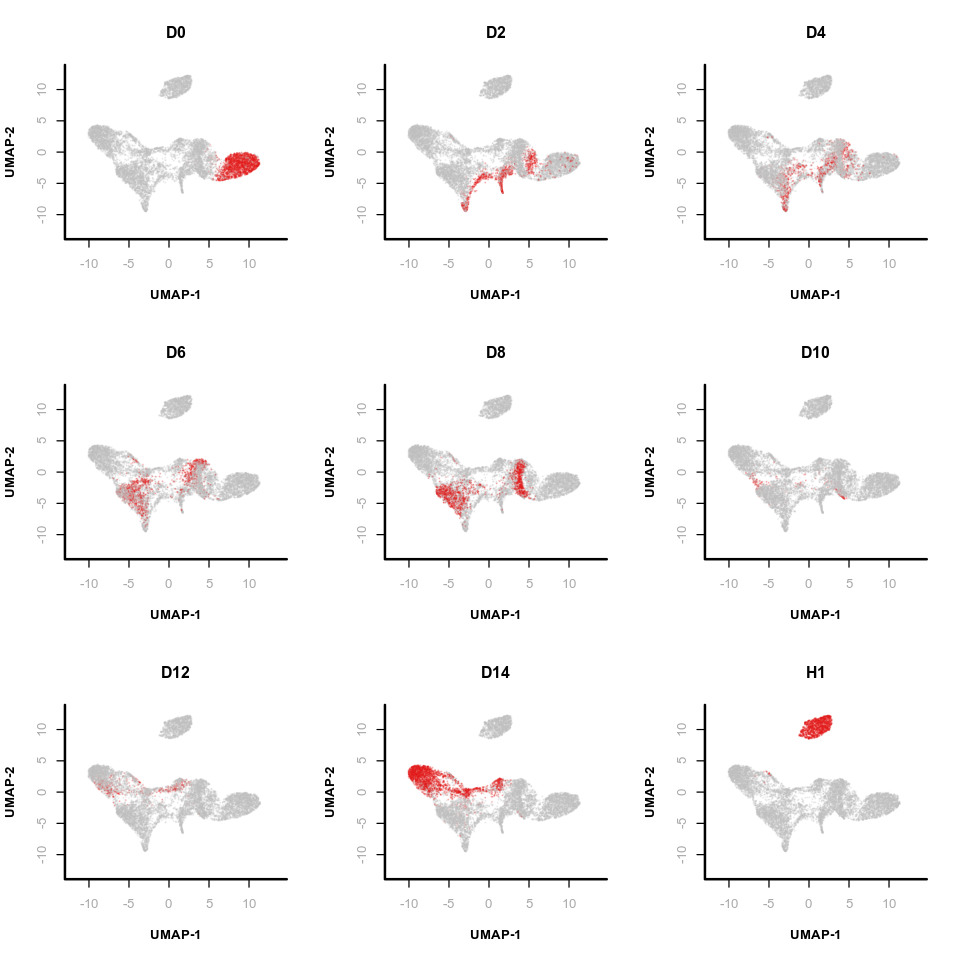

In [119]:
par(mfrow = c(3, 3));
for(d in DAYS){
  plotViz(
    obj=x.sp,
    method="umap", 
    main=d,
    point.color=x.sp@sample==d, 
    point.size=0.01,
    point.alpha=0.2,
    text.add= FALSE,
    down.sample=10000,
    legend.add=FALSE,
#     pdf.file.name = sprintf("./figs/%s_5kb_selectedBarcodes_gt1000_n%d_UMAP_day", format(Sys.Date(), "%Y%m%d"), dim(x.sp@bmat)[1])
  );
}

In [129]:
# plotFeatureSingle(
#     obj=x.sp,
#     feature.value=log10(rowCovs),
#     method="umap", 
#     main="By depth",
#     point.size=0.1, 
#     point.shape=19, 
#     down.sample=NULL,
#     quantiles=c(0.01, 0.99),
#     pdf.file.name = sprintf("./figs/%s_5kb_selectedBarcodes_gt1000_n%d_UMAP_depth.pdf", format(Sys.Date(), "%Y%m%d"), dim(x.sp@bmat)[1])
#   ); 

In [ ]:
# x.sp = runViz(
#     obj=x.sp, 
#     tmp.folder=tempdir(),
#     dims=2,
#     eigs.dims=1:18, 
#     method="Rtsne",
#     seed.use=10,
#     num.cores=10
#   );

In [ ]:
# plotViz(
#     obj=x.sp,
#     method="tsne", 
#     main="All Cells",
#     point.color=x.sp@sample, 
#     point.size=0.1, 
#     text.add= FALSE,
#     down.sample=NULL,
#     legend.add=TRUE,
# #     pdf.file.name = sprintf("./figs/%s_5kb_gt1000_n%d_TSNE.pdf", format(Sys.Date(), "%Y%m%d"), dim(x.sp@bmat)[1])
#   );

In [ ]:
# plotFeatureSingle(
#     obj=x.sp,
#     feature.value=log10(rowCovs),
#     method="tsne", 
#     main="By depth",
#     point.size=0.1, 
#     point.shape=19, 
#     down.sample=NULL,
#     quantiles=c(0.01, 0.99)
#   ); 

In [54]:
# library(harmony)
# x.after.sp = runHarmony(
#   obj=x.sp, 
#   eigs.dim=1:18, 
#   meta_data=x.sp@sample # sample index
# );

In [55]:
# x.after.sp = runViz(
#    obj=x.after.sp, 
#    tmp.folder=tempdir(),
#    dims=2,
#    eigs.dims=1:18, 
#    method="umap",
#    seed.use=10
#  );

In [56]:
# plotViz(
#     obj=x.after.sp,
#     method="umap", 
#     main="All Cells (After Harmony)",
#     point.color=x.sp@sample, 
#     point.size=0.5, 
#     text.add= FALSE,
#     down.sample=10000,
#     legend.add=TRUE,
# #     pdf.file.name = sprintf("./figs/%s_5kb_gt1000_n%d_UMAP_harmony_sample", format(Sys.Date(), "%Y%m%d"), dim(x.sp@bmat)[1])
#   );

In [ ]:
# re-add non-binarized cell-by-bin matrix
x.sp.raw = addBmatToSnap(x.sp);

Epoch: reading cell-bin count matrix session ...


In [ ]:
x.sp.raw

In [174]:
# library(TxDb.Hsapiens.UCSC.hg38.knownGene)
# txdb = TxDb.Hsapiens.UCSC.hg38.knownGene
# genes.hg38 = genes(txdb)

In [ ]:
# genes(txdb, columns="gene_id")

In [175]:
# marker.genes = c(
#     2597, #"GAPDH"
#     7070, # THY1
#     3725, # "JUN" 
#     5460, # "OCT4"
#     79923, # "NANOG"
#     2103, # "ESRRB"
#     57167, #SALL4
#     2335, #"FN1"
#     7431, #"VIM"
#     58, #"ACTA1"
#     7015, #"TERT"
#     429 #"ASCL1"
# )

# marker.genes.names = c(
#     "GAPDH",
#     "THY1",
#     "JUN",
#     "OCT4",
#     "NANOG",
#     "ESRRB",
#     "SALL4",
#     "FN1",
#     "VIM",
#     "ACTA1",
#     "TERT",
#     "ASCL1"
# )

In [ ]:
# use promoters of genes
# genes.sel.gr = promoters(genes.hg38[genes.hg38$gene_id %in% marker.genes], upstream = 2000, downstream = 0)
# genes.sel.gr$name = marker.genes.names[order(as.character(marker.genes))]
# genes.sel.gr
# CHECK ID AND NAME LINE UP

In [159]:
# x.sp.raw = createGmatFromMat(
#     obj=x.sp.raw, 
#     input.mat="bmat",
#     genes=genes.sel.gr,
#     do.par=TRUE,
#     num.cores=10
# );

In [157]:
# normalize the cell-by-gene matrix
# x.sp.raw = scaleCountMatrix(
#   obj=x.sp.raw, 
#   cov=rowCovs, # TODO: check if this is the right input
#   mat="gmat",
#   method = "RPM"
# );

# smooth the cell-by-gene matrix
# raises knn similarity matrix to 3-- VERY SLOW 


In [147]:
myRunMagic <- function (obj, input.mat, step.size) {
    A = obj@graph@mat;
    data.use = obj@gmat;
    # 4. smooth
    A = A + t(A);
    A = A / Matrix::rowSums(A);
    data.use.smooth = A %*% data.use;
    if(step.size > 1){
        for(i in 1:step.size){
            data.use.smooth = A %*% data.use.smooth;
        }
    }
    
    slot(obj, input.mat) = data.use.smooth;    
    return(obj)
}

In [162]:
# x.sp = myRunMagic(
#   obj=x.sp,
#   input.mat="gmat",
#   step.size=1
# );

# x.sp.raw = myRunMagic(
#   obj=x.sp.raw,
#   input.mat="gmat",
#   step.size=8
# );

In [ ]:
# par(mfrow = c(3, 3));
# for(i in 1:length(marker.genes)){
#   plotFeatureSingle(
#       obj=x.sp.raw,
#       feature.value=x.sp.raw@gmat[, marker.genes.names[i]],
#       method="umap", 
#       main=marker.genes.names[i],
#       point.size=0.01, 
#       point.shape=19, 
#       down.sample=NULL,
#       quantiles=c(0, 1)
# )};



## Export Meta Data for Session

In [104]:
x.sp

number of barcodes: 62402
number of bins: 542721
number of genes: 0
number of peaks: 0
number of motifs: 0

In [106]:
myExportMetaData <- function(obj, file, slot.names) {
    metaData.ls = lapply(as.list(slot.names), function(x){
        if(x == "barcode"){
            y = data.frame(slot(obj, x));
            colnames(y) = "barcode"
        }else if(x == "tsne"){
            y = data.frame(slot(obj, x));
            colnames(y) = c("tsne1", "tsne2");
        }else if(x == "umap"){
            y = data.frame(slot(obj, x));
            colnames(y) = c("umap1", "umap2");
        }else if(x == "cluster"){
            y = data.frame(slot(obj, x));
            colnames(y) = "cluster"
        }else if(x == "sample"){
            y = data.frame(slot(obj, x));
            colnames(y) = "sample"
        }else{
            y = data.frame(slot(obj, x));
        }
        y
    })
    
    if(!all(sapply(lapply(metaData.ls, nrow), FUN = identical, nrow(metaData.ls[[1]])))){
        stop("slot in subset.names have different length")
    }
    
    metaData.df = do.call(cbind, metaData.ls);

    write.table(metaData.df, file = file, append = FALSE, quote = FALSE, sep = "\t",
                eol = "\n", na = "NA", dec = ".", row.names = FALSE,
                col.names = TRUE, qmethod = c("escape", "double"),
                fileEncoding = "")
}

# if you've manually changed the clusters, make sure to update them at x.sp@metaData$cluster
# myExportMetaData(x.sp, "./snapATAC_sessions/20200501_n76052/metadata.tsv", slot.names=c('barcode', 'cluster', 'umap', 'metaData', 'sample'))
myExportMetaData(x.sp, "./snapATAC_sessions/20201020_n62402/metadata.tsv", slot.names=c( 'metaData', 'umap', 'sample'))

In [130]:
# write.table(x.sp@smat@dmat, "./snapATAC_sessions/20200125_n76770/eig_mat.tsv", sep="\t", row.names= FALSE, col.names = FALSE, quote = FALSE)

In [131]:
# writing ranges for 5kb and sparse matrix
# write.table(data.frame(seqnames=seqnames(x.sp@feature),
#                        starts=start(x.sp@feature)-1,
#                        ends=end(x.sp@feature)),
#             file="./snapATAC_sessions/20200125_n76770/5kb.ranges.bed",
#             quote=F, sep="\t", row.names=F, col.names=F)

In [132]:
# writeMM(x.sp@bmat, file="./snapATAC_sessions/20200125_n76770/5kb.sparse.mm")

In [ ]:
# How to get the order in which a list A can be transformed to a list B 
# When both have same unique elements in them
# o(A)   o(B) o(o(B))   o(A)[o(o(B))] <---- that's what you need to do
# 3   ->  4     3           2
# 4   ->  2     2           4 
# 2   ->  1     4           1
# 1   ->  3     1           3

In [32]:
# metaData = read.table("./snapATAC_sessions/20200125_n76770/metadata.tsv", header = T)
# metaData$sample_barcode = paste(as.character(metaData$sample), as.character(metaData$barcode), sep='_')

In [ ]:
# actual_sample_barcode = paste(x.sp.raw@sample, x.sp.raw@barcode, sep="_")

In [ ]:
# sort_order = order(actual_sample_barcode)[order(order(metaData$sample_barcode))]

In [ ]:
# all(actual_sample_barcode[sort_order] == metaData$sample_barcode)

In [42]:
# writeMM(x.sp.raw@bmat[sort_order, ], file="./snapATAC_sessions/20200125_n76770/5kb.full.mm")

NULL

## Write Fragment for each cluster

In [290]:
writeClusterFragmentsToBed <- function(
    obj, 
    output.prefix,
    path.to.snaptools,
    buffer.size=500,
    num.cores=10
){
    fileList = as.list(unique(obj@file));
 
    # check if files are all snap files
    if(any(do.call(c, lapply(fileList, function(x){isSnapFile(x)})) == FALSE)){
        idx = which(do.call(c, lapply(fileList, function(x){isSnapFile(x)})) == FALSE)
        print("error: these files are not snap file")
        print(fileList[idx])
        stop()
    }
    
    # check if FM session exist
    if(any(do.call(c, lapply(fileList, function(x){ "FM" %in% h5ls(x, recursive=1)$name  })) == FALSE)){
        idx = which(do.call(c, lapply(fileList, function(x){ "FM" %in% h5ls(x, recursive=1)$name  })) == FALSE)
        print("error: the following nsap files do not contain FM session")
        print(fileList[idx])
        stop()
    }
        
    # write the following barcodes down
    barcode.files = lapply(fileList, function(file){
        tempfile(tmpdir = tempdir(), fileext = ".barcode.txt");
    })

    bed.files = lapply(fileList, function(file){
        tempfile(tmpdir = tempdir(), fileext = ".bed.gz");
    })
    
    # write down the barcodes
    cat("Epoch: extracting fragments from each snap files ...\n", file = stderr())
    flag.list = lapply(seq(fileList), function(i){
        file.name = fileList[[i]];
        idx = which(obj@file == file.name);
        barcode.use = obj@barcode[idx]
        message(barcode.files[[i]])
        message(bed.files[[i]])
        message(fileList[[i]])
        write.table(barcode.use, file = barcode.files[[i]], append = FALSE, quote = FALSE, sep = "\t",
                         eol = "\n", na = "NA", dec = ".", row.names = FALSE,
                         col.names = FALSE, qmethod = c("escape", "double"),
                         fileEncoding = "")
        
    })

    # extract the fragments belong to the barcodes    
    flag.list = mclapply(seq(fileList), function(i){
        flag = system2(command=path.to.snaptools, 
            args=c("dump-fragment", 
                   "--snap-file", fileList[[i]], 
                   "--output-file", bed.files[[i]], 
                   "--barcode-file", barcode.files[[i]],
                   "--buffer-size", buffer.size
                   )        
            )                
    }, mc.cores=num.cores);
    
    # combine these bed files
    combined.bed = paste(output.prefix, ".bed.gz");
    flag = system2(command="cat", 
        args=c(paste(bed.files, collapse = ' '),
               ">", combined.bed
               )        
        )                
}

In [ ]:
cluster_names = names(table(x.sp@cluster))
# mclapply(seq(cluster_names), function(i){
#     print(cluster_names[i]);
#     writeClusterFragmentsToBed(
#         obj=x.sp[which(x.sp@cluster==cluster_names[i]),], 
#         output.prefix=paste0("./snapATAC_sessions/20200125_n76770/cluster_beds/idx", cluster_names[i]),
#         path.to.snaptools="/users/surag/anaconda3/envs/snapATAC/bin/snaptools",
#         buffer.size=500, 
#         num.cores=1
#    );
#  }, mc.cores=5);

In [103]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/snapATAC/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] TxDb.Hsapiens.UCSC.hg38.knownGene_3.4.0
 [2] GenomicFeatures_1.34.1                 
 [3] AnnotationDbi_1.44.0                   
 [4] Biobase_2.42.0                         
 [5] RColorBrewer_1.1-2                     
 [6] leiden_0.3.3                           
 [7] sca